<a href="https://colab.research.google.com/github/mallicksiddartha/FCC_TF_classifier/blob/main/feed_forward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

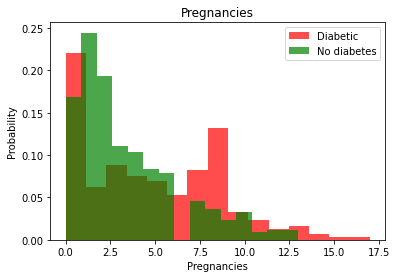

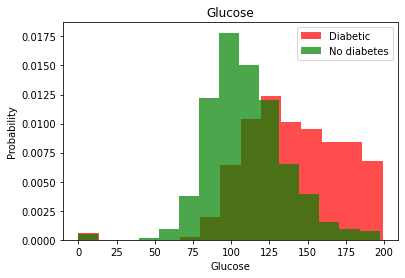

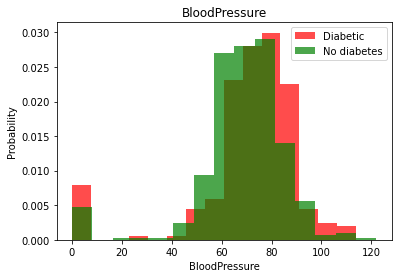

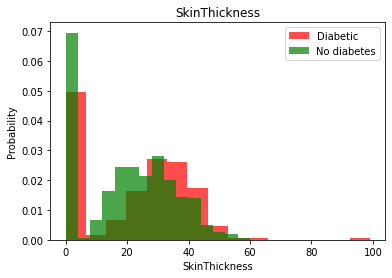

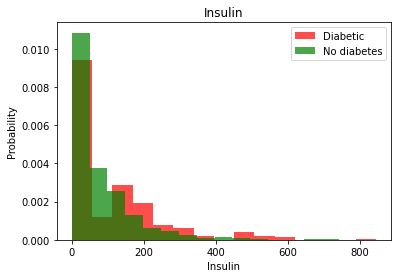

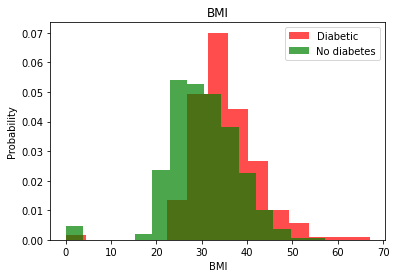

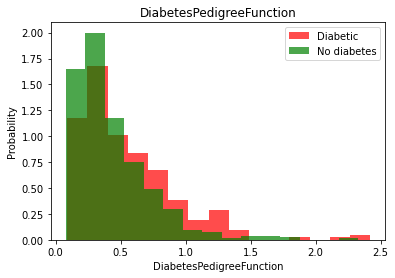

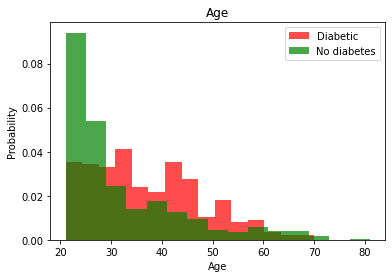

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

data = pd.read_csv('diabetes.csv')

data.head()

for i in range(len(data.columns[:-1])) :
  label = data.columns[i]
  plt.hist(data[data['Outcome'] == 1][label], color='Red', label='Diabetic', alpha=0.7, density=True, bins=15)
  plt.hist(data[data['Outcome'] == 0][label], color='Green', label='No diabetes', alpha=0.7, density = True, bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:
X = data[data.columns[:-1]].values
Y = data[data.columns[-1]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
over_sample = RandomOverSampler()
X, Y = over_sample.fit_resample(X, Y)

new_data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(new_data, columns=data.columns)


In [ ]:
len(transformed_df[transformed_df['Outcome'] == 1]), len(transformed_df[transformed_df['Outcome'] == 0])

(500, 500)

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=0)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_valid, Y_valid)

model.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_valid, Y_valid))

7/7 [==============================] - 0s 3ms/step - loss: 0.7943 - accuracy: 0.5450
Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.7251 - accuracy: 0.5567 - val_loss: 0.6817 - val_accuracy: 0.6150
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6267 - val_loss: 0.6238 - val_accuracy: 0.6900
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.6933 - val_loss: 0.5825 - val_accuracy: 0.7200
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.7267 - val_loss: 0.5476 - val_accuracy: 0.7400
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.7317 - val_loss: 0.5220 - val_accuracy: 0.7650
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7350 - val_loss: 0.5028 - val_accuracy: 0.7700
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5

In [ ]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7850


[0.49019625782966614, 0.7850000262260437]